# Stage 1 : Data Exploration

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import seaborn as sns 

In [2]:
df= pd.read_csv('top250-00-19.csv')
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [3]:
df.describe()

,Age,Market_value,Transfer_fee
count,4700.000000,3.440000e+03,4.700000e+03
mean,24.338723,8.622469e+06,9.447586e+06
std,3.230809,8.795181e+06,1.043772e+07
min,0.000000,5.000000e+04,8.250000e+05
25%,22.000000,3.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,1.000000e+07,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [5]:
df.isnull().sum()

Name               0
Position           0
Age                0
Team_from          0
League_from        0
Team_to            0
League_to          0
Season             0
Market_value    1260
Transfer_fee       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.corr()

,Age,Market_value,Transfer_fee
Age,1.000000,0.142739,-0.001803
Market_value,0.142739,1.000000,0.830573
Transfer_fee,-0.001803,0.830573,1.000000


# Stage 2: Data Manipulation

In [8]:
Defender=['Centre-Back','Right-Back','Left-Back','Defender']
Forward = ['Right Winger','Centre-Forward','Left Winger','Forward','Sweeper','Second Striker']
Midfielder = ['Central Midfield', 'Attacking Midfield', 'Defensive Midfield', 'Left Midfield','Right Midfield', 'Midfielder']
conditions = [
    df['Position'].isin(Defender),
    df['Position'].isin(Forward),
    df['Position'].isin(Midfielder),
    df['Position']=='Goalkeeper']
 
values = ['Defender', 'Forward','Midfielder','Goalkeeper']

df['Position'] = np.select(conditions, values)

In [9]:
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Forward,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Forward,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [10]:
top5 = ['Premier League', 'Serie A', 'LaLiga', 'Ligue 1', '1.Bundesliga']
df_top5 = df.loc[ (df['League_to'].isin(top5))]

# Stage 3: Exploratory Data Analysis (EDA)

## A. General Stats

### The Most Requested Position in Top 5 Leagues

In [11]:
df_top5['Position'].value_counts().sort_values(ascending=False)

Forward       1292
Midfielder    1030
Defender       868
Goalkeeper     149
Name: Position, dtype: int64

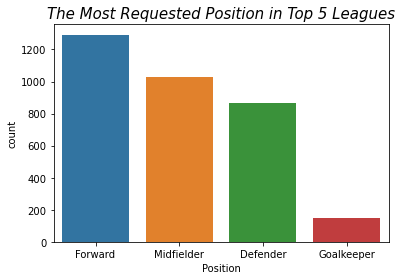

In [12]:
sns.countplot(x='Position',data=df_top5,order=df_top5['Position'].value_counts().sort_values(ascending=False).index)
#plt.xticks(rotation=90,fontsize='12')
plt.title('The Most Requested Position in Top 5 Leagues',ha='center',fontsize=15,style='oblique')
plt.show()

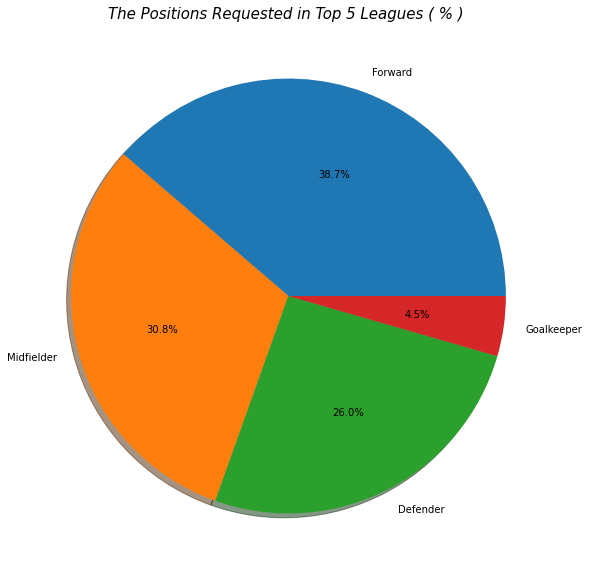

In [13]:
df_top5['Position'].value_counts().plot(kind='pie',figsize=(20,10),autopct = '%1.1f%%',shadow = True)
plt.ylabel('')
plt.title('The Positions Requested in Top 5 Leagues ( % ) ',ha='center',fontsize=15,style='oblique')
plt.show()

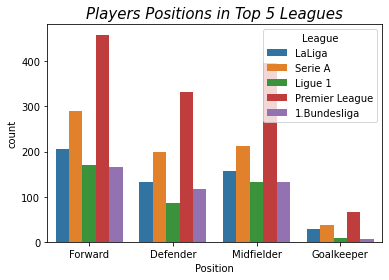

In [14]:
sns.countplot(x='Position',hue='League_to',data=df_top5)
plt.title('Players Positions in Top 5 Leagues',fontsize=15,style='oblique')
plt.legend(title='League')
plt.show()

### How many transfers are made each season ?

In [15]:
df_top5.groupby(['Season'])['Season'].count()

Season
2000-2001    176
2001-2002    194
2002-2003    157
2003-2004    142
2004-2005    162
2005-2006    168
2006-2007    187
2007-2008    203
2008-2009    190
2009-2010    175
2010-2011    151
2011-2012    171
2012-2013    167
2013-2014    159
2014-2015    167
2015-2016    187
2016-2017    182
2017-2018    209
2018-2019    192
Name: Season, dtype: int64

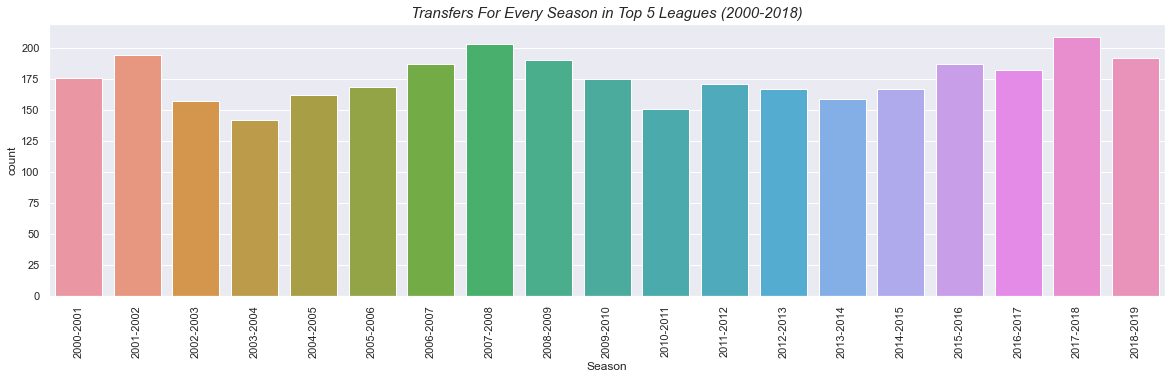

In [63]:
sns.countplot(x='Season',data=df_top5)
plt.xticks(rotation=90)
plt.title('Transfers For Every Season in Top 5 Leagues (2000-2018)',fontsize=15,style='oblique')
plt.show()

In [17]:
df_top5.groupby(['League_to','Season'])['Season'].count()

League_to     Season   
1.Bundesliga  2000-2001    17
              2001-2002    26
              2002-2003    31
              2003-2004    14
              2004-2005    17
                           ..
Serie A       2014-2015    31
              2015-2016    31
              2016-2017    35
              2017-2018    36
              2018-2019    58
Name: Season, Length: 95, dtype: int64

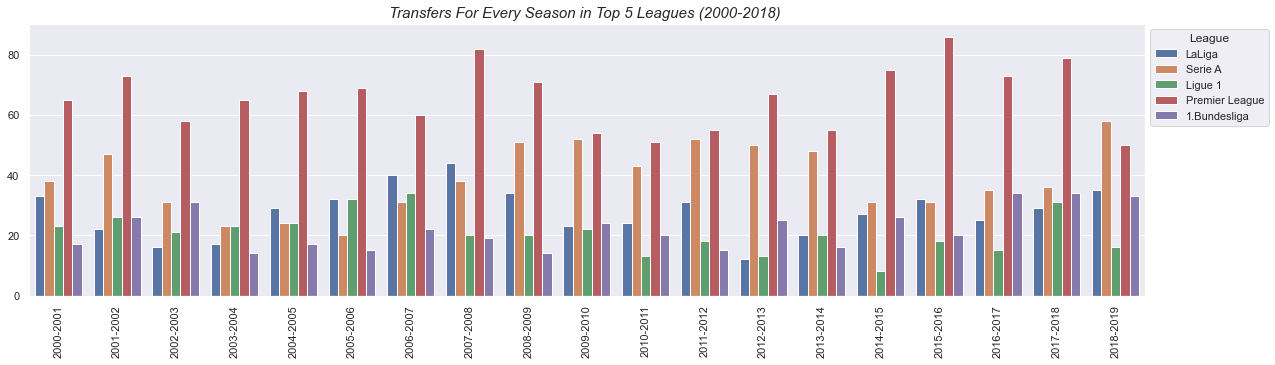

In [64]:
sns.countplot(x='Season',hue='League_to',data=df_top5)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('')
plt.title('Transfers For Every Season in Top 5 Leagues (2000-2018) ',fontsize=15,style='oblique')
plt.legend(title='League', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

### Which League Pays The Most Money in Transfer Market? 

In [19]:
League_buy = df_top5.groupby(['League_to'])['Transfer_fee'].sum().sort_values(ascending=False)
League_buy

League_to
Premier League    14695400000
Serie A            7535220000
LaLiga             6680360000
Ligue 1            3682720000
1.Bundesliga       3599645000
Name: Transfer_fee, dtype: int64

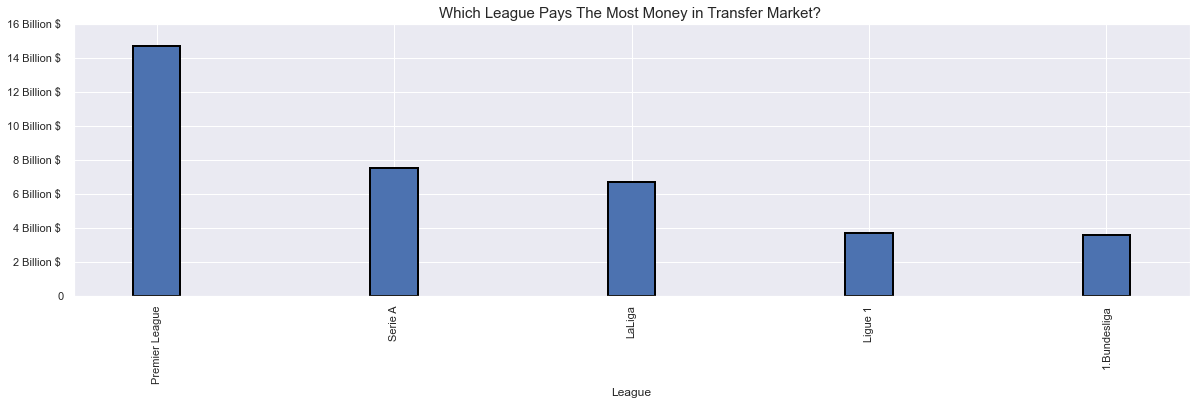

In [20]:
League_buy = df_top5.groupby(['League_to'])['Transfer_fee'].sum().sort_values(ascending=False)
League_buy.plot(kind='bar',lw=2,edgecolor='black',width=0.2)
plt.xlabel('League',fontsize=12)
yticks = list(np.arange(0,18000000000,2000000000))
plt.yticks(ticks=yticks, labels =[f"{round(int(y)/1000000000)} Billion $ " if y > 0 else "0" for y in yticks] )
plt.title('Which League Pays The Most Money in Transfer Market? ',fontsize=15)
plt.show()

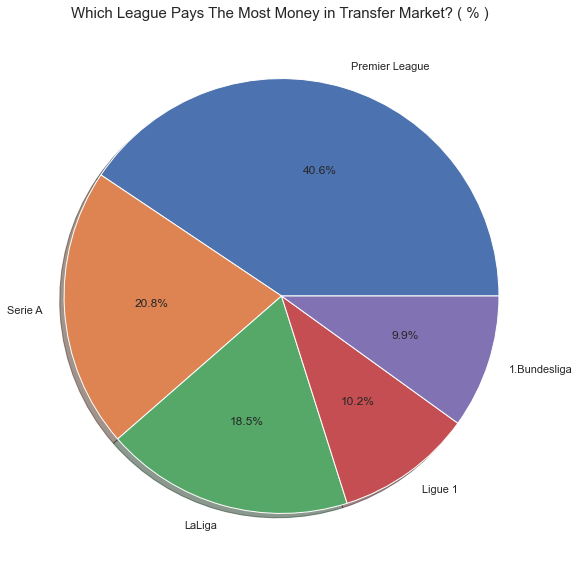

In [21]:
League_buy.plot(kind='pie',figsize=(20,10),autopct = '%1.1f%%',shadow = True)
plt.title('Which League Pays The Most Money in Transfer Market? ( % ) ',fontsize=15)
plt.ylabel('')
plt.show()

### Which League Gains The Most Money From Selling Players? 

In [22]:
League_sell = df_top5.groupby(['League_from'])['Transfer_fee'].sum().sort_values(ascending=False)
League_sell

League_from
Serie A                  6571000000
Premier League           6502180000
LaLiga                   4930140000
Ligue 1                  4002760000
1.Bundesliga             2855810000
                            ...    
Primera Div. Apertura       2000000
J1 - 2nd Stage              2000000
Regionalliga Nord           1800000
 China                      1300000
Challenge League             825000
Name: Transfer_fee, Length: 86, dtype: int64

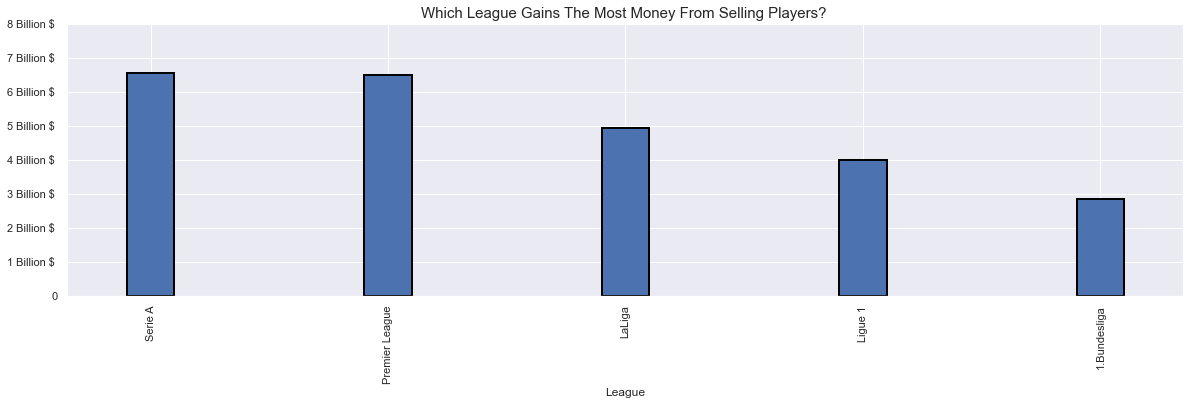

In [23]:
League_sell.head().plot(kind='bar',lw=2,edgecolor='black',width=0.2)
yticks = list(np.arange(0,9000000000,1000000000))
plt.xlabel('League')
plt.title('Which League Gains The Most Money From Selling Players? ',fontsize = 15)
plt.yticks(ticks=yticks, labels =[f"{round(int(y)/1000000000)} Billion $ " if y > 0 else "0" for y in yticks] )
plt.show()

###  Do Top 5 leagues make profits or losses from buying and selling players?

In [24]:
profits = League_sell - League_buy
profits.sort_values(inplace=True)
profits.head()/1000000000

Premier League   -8.193220
LaLiga           -1.750220
Serie A          -0.964220
1.Bundesliga     -0.743835
Ligue 1           0.320040
Name: Transfer_fee, dtype: float64

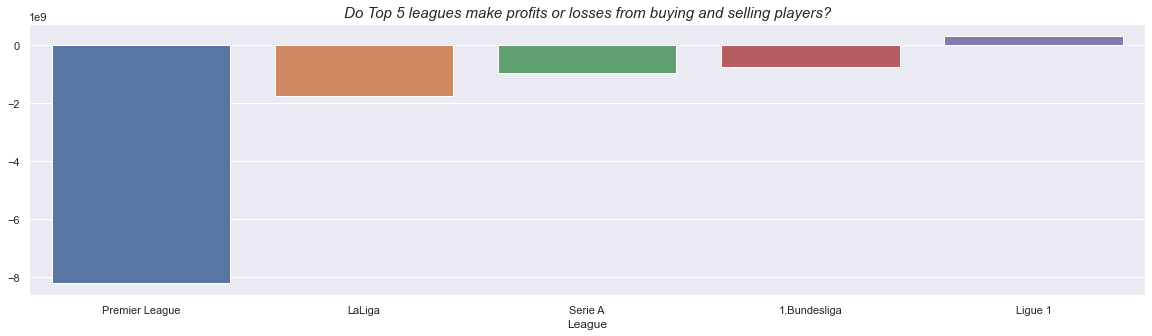

In [25]:
sns.barplot(x=profits.head().index,y=profits.head().values,data=profits.head())
plt.xticks(ticks=np.arange(0,5,1),labels=profits.head().index)
plt.title('Do Top 5 leagues make profits or losses from buying and selling players?',style='oblique',fontsize=15)
plt.xlabel('League')
plt.show()

###  Which League made the most transfers in? 

In [26]:
df_top5['League_to'].value_counts()

Premier League    1256
Serie A            739
LaLiga             525
1.Bundesliga       422
Ligue 1            397
Name: League_to, dtype: int64

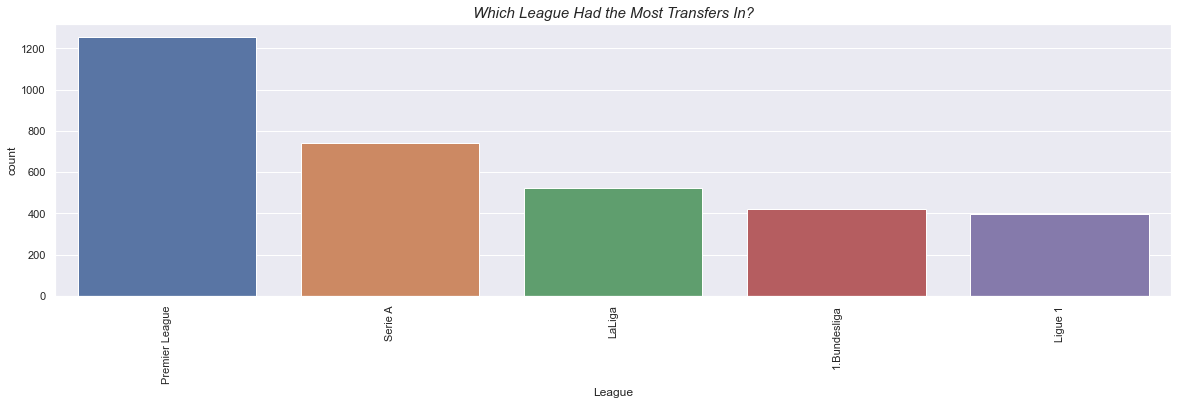

In [27]:
sns.countplot(x='League_to',data=df_top5,order=df_top5['League_to'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('League')
plt.title('Which League Had the Most Transfers In?',fontsize=15,style='oblique')
plt.show()

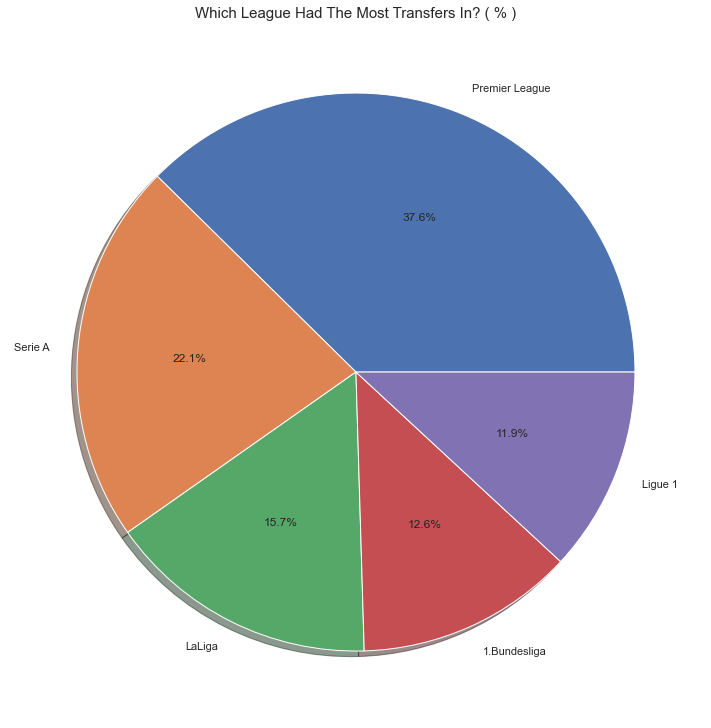

In [28]:
df_top5['League_to'].value_counts().plot(kind='pie',figsize=(12.5,20),autopct = '%1.1f%%',shadow = True)
plt.title('Which League Had The Most Transfers In? ( % )',fontsize=15)
plt.ylabel('')
plt.show()

### The most number of transfers between leagues

In [29]:
df_top5.groupby(['League_to','League_from'])['League_to'].count().sort_values(ascending=False).head()

League_to       League_from   
Premier League  Premier League    374
Serie A         Serie A           359
Ligue 1         Ligue 1           159
Premier League  Championship      151
LaLiga          LaLiga            147
Name: League_to, dtype: int64

## B. Team Stats

### The teams with the largest transfer fee

In [30]:
top_buyers=df_top5.groupby(['Team_to','League_to'])['Transfer_fee'].sum().sort_values(ascending=False)
top_buyers.head(10)

Team_to       League_to     
Chelsea       Premier League    1820650000
Man City      Premier League    1779660000
Real Madrid   LaLiga            1680650000
FC Barcelona  LaLiga            1673040000
Man Utd       Premier League    1497360000
Juventus      Serie A           1466940000
Liverpool     Premier League    1412420000
Paris SG      Ligue 1           1274780000
Inter         Serie A           1202690000
Spurs         Premier League    1024400000
Name: Transfer_fee, dtype: int64

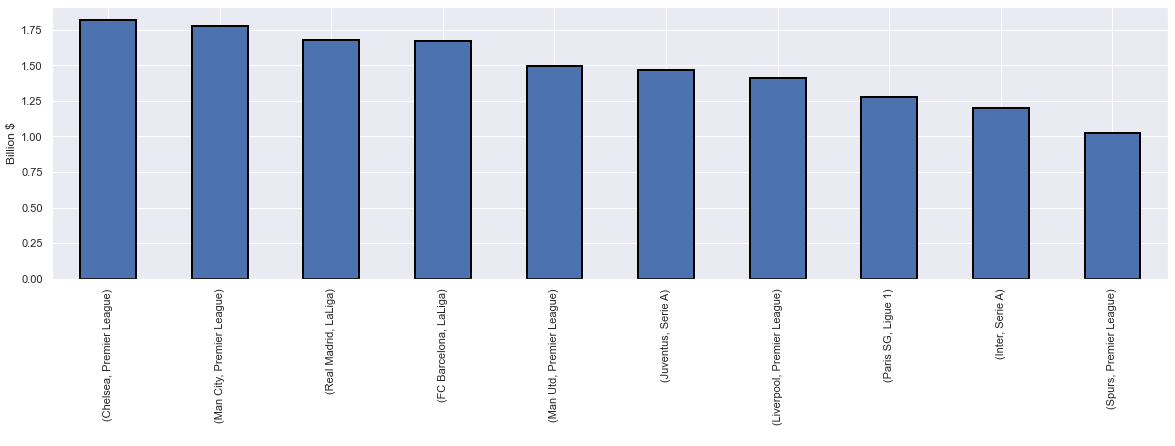

In [75]:
(top_buyers.head(10)/1000000000).plot(kind='bar',lw=2,edgecolor='black')
plt.xlabel(' ')
plt.ylabel('Billion $')
plt.show()

### The teams with the most gained money

In [32]:
top_sellers= df_top5.groupby(['Team_from','League_from'])['Transfer_fee'].sum().sort_values(ascending=False)
top_sellers.head(10)

Team_from     League_from   
Monaco        Ligue 1           930170000
Real Madrid   LaLiga            858400000
Liverpool     Premier League    773160000
FC Porto      Liga NOS          741350000
Inter         Serie A           704600000
FC Barcelona  LaLiga            686950000
Chelsea       Premier League    679030000
Juventus      Serie A           671180000
AS Roma       Serie A           662700000
Benfica       Liga NOS          650670000
Name: Transfer_fee, dtype: int64

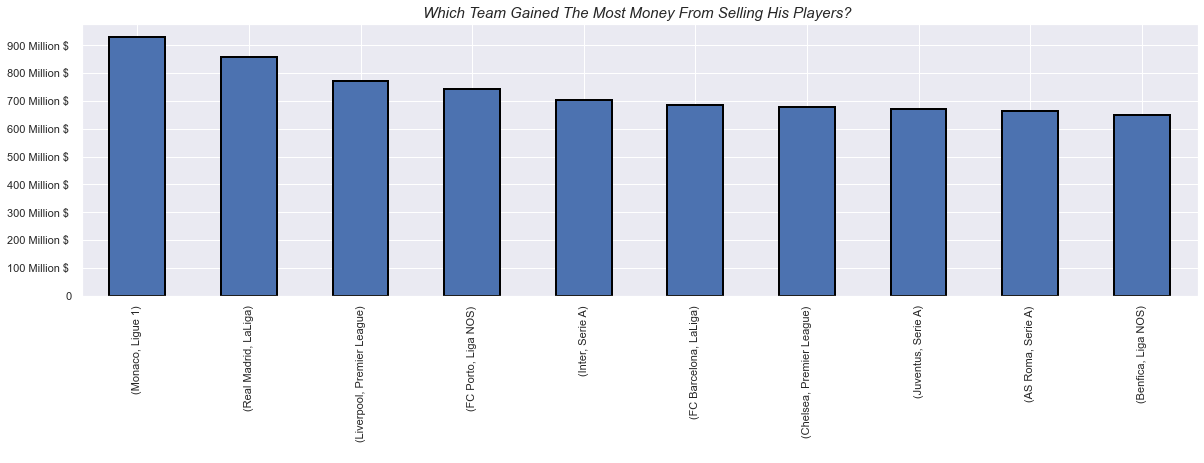

In [33]:
top_sellers= df_top5.groupby(['Team_from','League_from'])['Transfer_fee'].sum().sort_values(ascending=False)
top_sellers.head(10).plot(kind='bar',lw=2,edgecolor='black')
yticks = list(np.arange(0,1000000000,100000000))
plt.yticks(ticks=yticks, labels =[f"{round(int(y)/1000000)} Million $ " if y > 0 else "0" for y in yticks] )
plt.title('Which Team Gained The Most Money From Selling His Players? ',fontsize=15,style='oblique')
plt.xlabel(' ')
plt.show()

### The team with the most transfers in the top 5 Leagues

In [34]:
df_top5['Team_to'].value_counts()[0:10]

Inter              97
Chelsea            96
Spurs              93
Man City           89
Juventus           86
Liverpool          85
AS Roma            77
Real Madrid        75
FC Barcelona       70
Atlético Madrid    69
Name: Team_to, dtype: int64

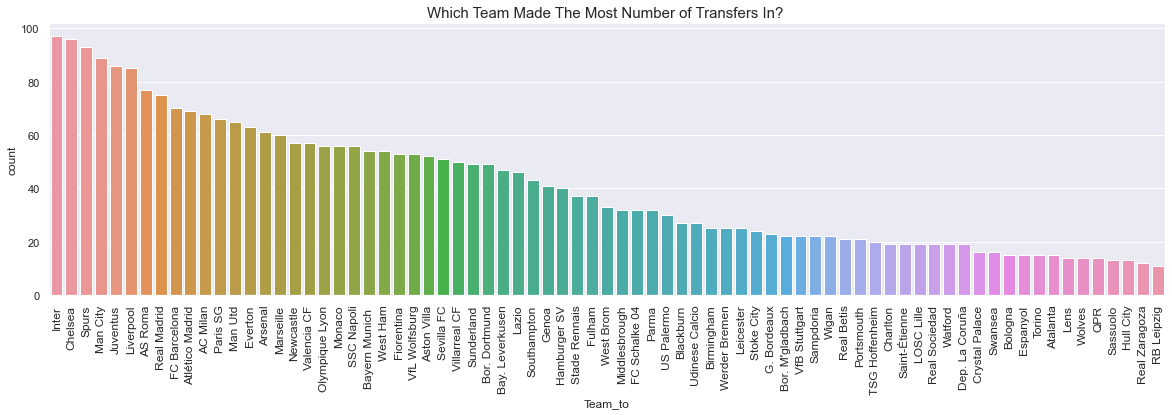

In [35]:
sns.countplot(x="Team_to", data=df_top5,order=df_top5['Team_to'].value_counts()[0:75].index)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(rotation=90,fontsize='12')
plt.title('Which Team Made The Most Number of Transfers In? ',fontsize=15)
plt.show()

### The team with the most transfers in 1.Bundesliga

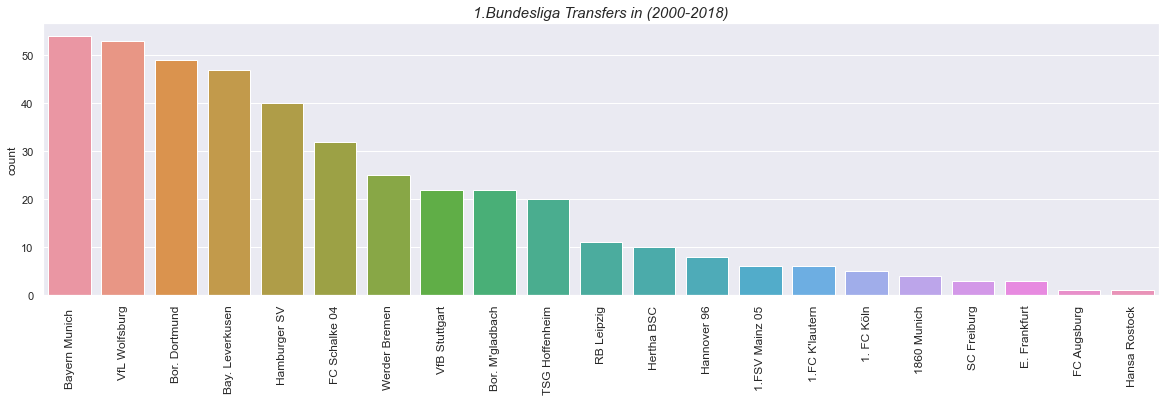

In [73]:
v=df.loc[df.League_to=='1.Bundesliga']
sns.countplot(x="Team_to", data=v,order=v['Team_to'].value_counts().index)
plt.xlabel(' ')
plt.xticks(rotation=90,fontsize='12')
plt.title('1.Bundesliga Transfers in (2000-2018)',fontsize=15,style='oblique')
plt.show()

### The team with the most transfers in LaLiga

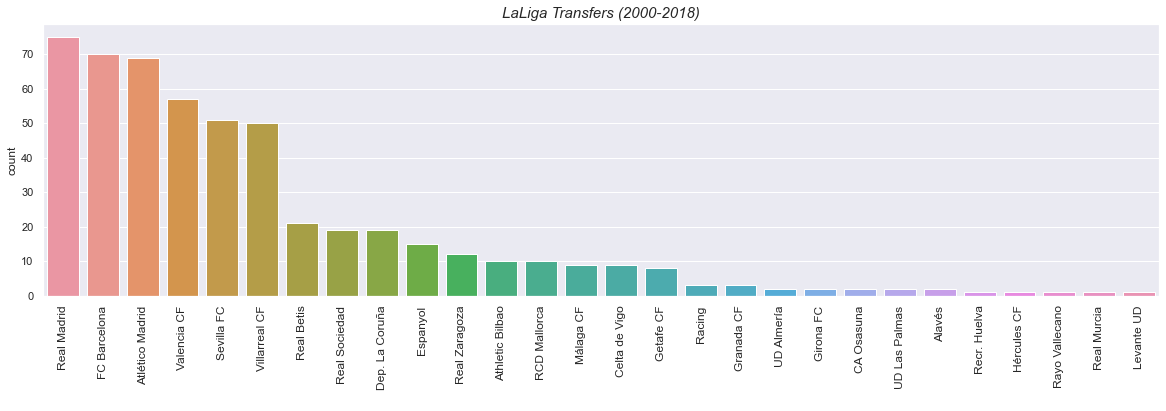

In [72]:
v=df.loc[df.League_to=='LaLiga']
sns.countplot(x="Team_to", data=v,order=v['Team_to'].value_counts()[0:28].index)
sns.set(rc={'figure.figsize':(20,5)})
plt.xlabel(' ')
plt.xticks(rotation=90,fontsize='12')
plt.title('LaLiga Transfers (2000-2018)',fontsize=15,style='oblique')
plt.show()

### The team with the most transfers in Ligue 1

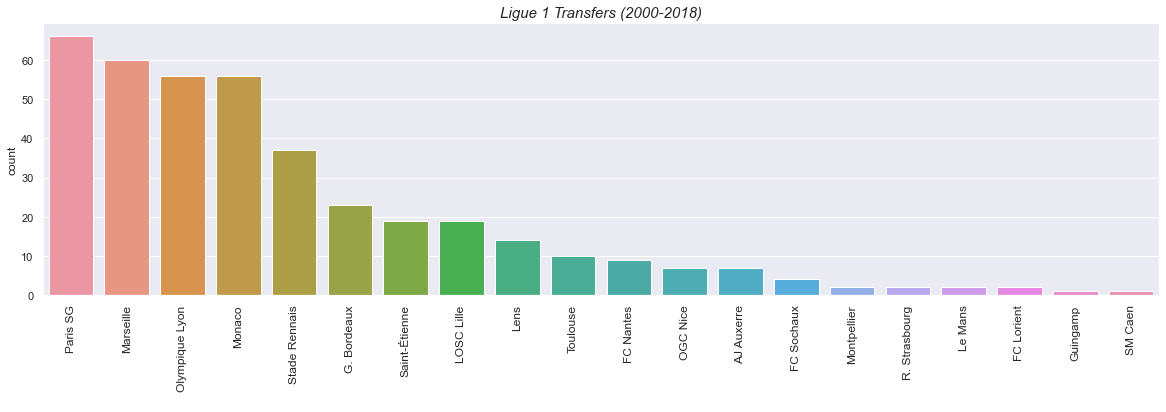

In [70]:
v=df.loc[df.League_to=='Ligue 1']
sns.countplot(x="Team_to", data=v,order=v['Team_to'].value_counts().index)
sns.set(rc={'figure.figsize':(20,5)})
plt.xlabel(' ')
plt.xticks(rotation=90,fontsize='12')
plt.title('Ligue 1 Transfers (2000-2018)',fontsize=15,style='oblique')
plt.show()

### The team with the most transfers in Premier League

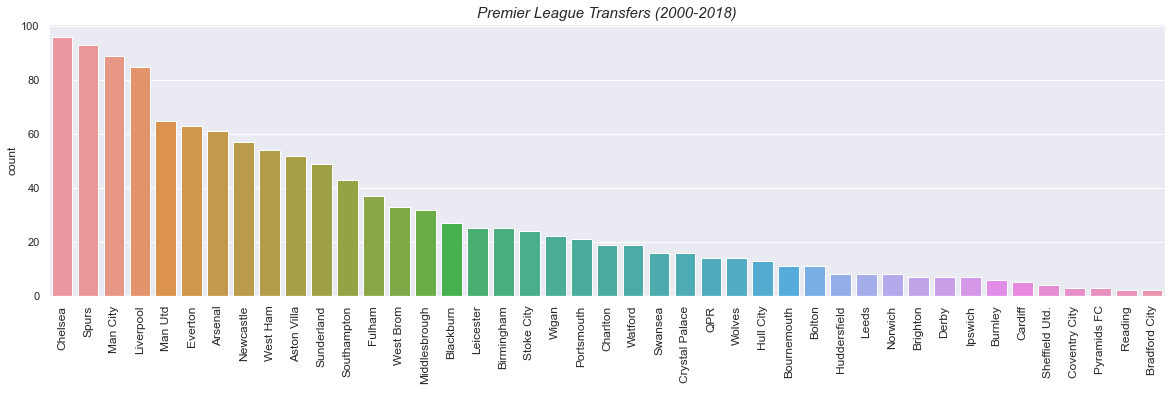

In [68]:
v=df.loc[df.League_to=='Premier League']
sns.color_palette("rocket", as_cmap=True)
sns.countplot(x="Team_to", data=v,order=v['Team_to'].value_counts().index)
sns.set(rc={'figure.figsize':(20,5)})
plt.xlabel(' ')
plt.xticks(rotation=90,fontsize='12')
plt.title('Premier League Transfers (2000-2018)',fontsize=15,style='oblique')
plt.show()

### The team with the most transfers in Serie A

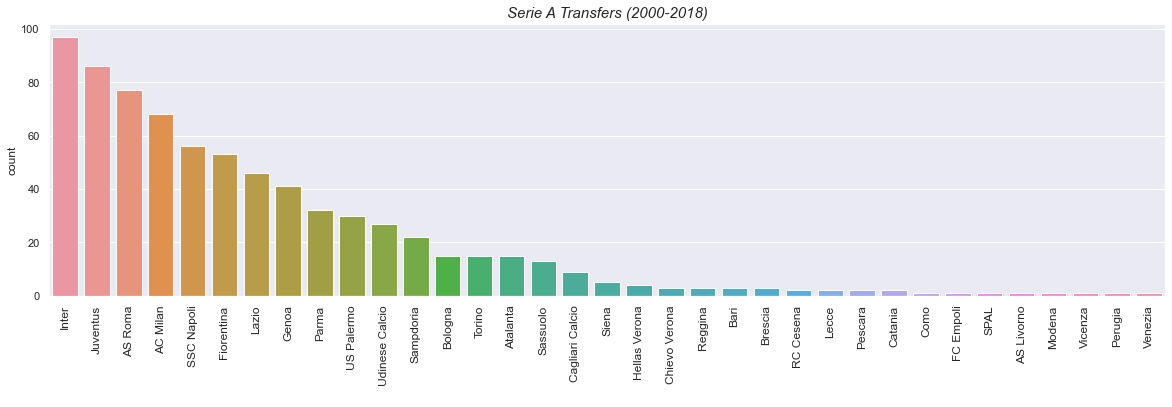

In [69]:
v=df.loc[df.League_to=='Serie A']
sns.countplot(x="Team_to", data=v,order=v['Team_to'].value_counts().index)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(rotation=90,fontsize='12')
plt.xlabel(' ')
plt.title('Serie A Transfers (2000-2018)',fontsize=15,style='oblique')
plt.show()

## C. Players stats

### Players' Age distribution

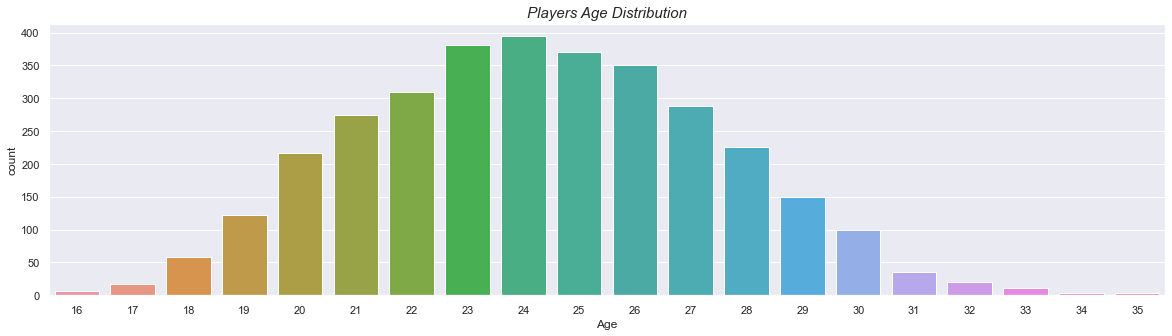

In [41]:
sns.countplot(x='Age',data=df_top5)
plt.title('Players Age Distribution',fontsize=15,style='oblique')
plt.show()

### Age VS Transfer fee stats

In [42]:
df_top5.groupby(['Age'])['Transfer_fee'].agg(['count','min','max'])

,count,min,max
Age,,,
16,7,3000000,21000000
17,17,2000000,24000000
18,58,2700000,45000000
19,122,1500000,135000000
20,217,950000,115000000
21,274,825000,88200000
22,310,1300000,70000000
23,381,1000000,105000000
24,394,900000,101000000


### Age VS League Stats

In [43]:
df_top5.groupby(['League_to'])['Age'].agg(['min','max','mean'])

,min,max,mean
League_to,,,
1.Bundesliga,17,35,23.725118
LaLiga,17,34,24.396190
Ligue 1,16,35,23.889169
Premier League,16,35,24.516720
Serie A,16,35,24.347767


### Age VS Position Stats

In [44]:
df_top5.groupby(['Position'])['Age'].agg(['min','max','mean'])

,min,max,mean
Position,,,
Defender,16,34,24.322581
Forward,16,33,24.079721
Goalkeeper,19,35,26.000000
Midfielder,16,35,24.265049


### Position VS Transfer fee Stats

In [45]:
df_top5.groupby(['Position'])['Transfer_fee'].agg(['min','max','mean'])

,min,max,mean
Position,,,
Defender,825000,78800000,9.288738e+06
Forward,900000,222000000,1.221750e+07
Goalkeeper,1320000,62500000,8.357248e+06
Midfielder,950000,125000000,1.077717e+07


### Top 5 Leagues - The Youngest Player

In [46]:
df_top5.loc[df_top5['Age'].idxmin()]

Name              Cesc Fàbregas
Position             Midfielder
Age                          16
Team_from       Barça Juvenil A
League_from               Spain
Team_to                 Arsenal
League_to        Premier League
Season                2003-2004
Market_value                NaN
Transfer_fee            3200000
Name: 841, dtype: object

### Top 5 Leagues - The Oldest Player

In [47]:
df_top5.loc[df_top5['Age'].idxmax()]

Name            José Luis Chilavert
Position                 Goalkeeper
Age                              35
Team_from           Vélez Sarsfield
League_from               Argentina
Team_to               R. Strasbourg
League_to                   Ligue 1
Season                    2000-2001
Market_value                    NaN
Transfer_fee                5300000
Name: 112, dtype: object

### Top 5 Leagues - The Highest Transfer fee

In [48]:
df_top5.loc[df_top5['Transfer_fee'].idxmax()]

Name                  Neymar
Position             Forward
Age                       25
Team_from       FC Barcelona
League_from           LaLiga
Team_to             Paris SG
League_to            Ligue 1
Season             2017-2018
Market_value     100000000.0
Transfer_fee       222000000
Name: 4211, dtype: object

### Top 5 Leagues - The Highest Market Value

In [49]:
df_top5.loc[df_top5['Market_value'].idxmax()]

Name            Kylian Mbappé
Position              Forward
Age                        19
Team_from              Monaco
League_from           Ligue 1
Team_to              Paris SG
League_to             Ligue 1
Season              2018-2019
Market_value      120000000.0
Transfer_fee        135000000
Name: 4455, dtype: object

### Top 10 Players ( Transfer Fee )

In [50]:
df_top5.sort_values('Transfer_fee',ascending=False)[0:10].reset_index(drop=True)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Neymar,Forward,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222000000
1,Kylian Mbappé,Forward,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000
2,Philippe Coutinho,Midfielder,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90000000.0,125000000
3,Cristiano Ronaldo,Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000
4,Ousmane Dembélé,Forward,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017-2018,33000000.0,115000000
5,Paul Pogba,Midfielder,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,70000000.0,105000000
6,Gareth Bale,Forward,24,Spurs,Premier League,Real Madrid,LaLiga,2013-2014,65000000.0,101000000
7,Cristiano Ronaldo,Forward,24,Man Utd,Premier League,Real Madrid,LaLiga,2009-2010,60000000.0,94000000
8,Gonzalo Higuaín,Forward,28,SSC Napoli,Serie A,Juventus,Serie A,2016-2017,65000000.0,90000000
9,Neymar,Forward,21,Santos FC,Série A,FC Barcelona,LaLiga,2013-2014,50000000.0,88200000


### Top 10 Players ( Market Value )

In [51]:
df_top5.sort_values('Market_value',ascending=False)[0:10].reset_index(drop=True)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Kylian Mbappé,Forward,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000
1,Cristiano Ronaldo,Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000
2,Neymar,Forward,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222000000
3,Philippe Coutinho,Midfielder,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90000000.0,125000000
4,Paul Pogba,Midfielder,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,70000000.0,105000000
5,Gareth Bale,Forward,24,Spurs,Premier League,Real Madrid,LaLiga,2013-2014,65000000.0,101000000
6,Gonzalo Higuaín,Forward,28,SSC Napoli,Serie A,Juventus,Serie A,2016-2017,65000000.0,90000000
7,Naby Keïta,Midfielder,23,RB Leipzig,1.Bundesliga,Liverpool,Premier League,2018-2019,65000000.0,60000000
8,Pierre-Emerick Aubameyang,Forward,28,Bor. Dortmund,1.Bundesliga,Arsenal,Premier League,2017-2018,65000000.0,63750000
9,Thomas Lemar,Forward,22,Monaco,Ligue 1,Atlético Madrid,LaLiga,2018-2019,65000000.0,70000000


### LaLiga - Top 10 Players (Transfer Fee)

In [52]:
spain = df_top5.loc[df_top5.League_to=='LaLiga'].sort_values('Transfer_fee',ascending=False).reset_index(drop=True)
spain.head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Philippe Coutinho,Midfielder,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90000000.0,125000000
1,Ousmane Dembélé,Forward,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017-2018,33000000.0,115000000
2,Gareth Bale,Forward,24,Spurs,Premier League,Real Madrid,LaLiga,2013-2014,65000000.0,101000000
3,Cristiano Ronaldo,Forward,24,Man Utd,Premier League,Real Madrid,LaLiga,2009-2010,60000000.0,94000000
4,Neymar,Forward,21,Santos FC,Série A,FC Barcelona,LaLiga,2013-2014,50000000.0,88200000
5,Luis Suárez,Forward,27,Liverpool,Premier League,FC Barcelona,LaLiga,2014-2015,52000000.0,81720000
6,Zinédine Zidane,Midfielder,29,Juventus,Serie A,Real Madrid,LaLiga,2001-2002,NaN,77500000
7,James Rodríguez,Midfielder,23,Monaco,Ligue 1,Real Madrid,LaLiga,2014-2015,60000000.0,75000000
8,Thomas Lemar,Forward,22,Monaco,Ligue 1,Atlético Madrid,LaLiga,2018-2019,65000000.0,70000000
9,Zlatan Ibrahimovic,Forward,27,Inter,Serie A,FC Barcelona,LaLiga,2009-2010,45000000.0,69500000


In [53]:
spain.head(10)['Team_to'].value_counts()

FC Barcelona       5
Real Madrid        4
Atlético Madrid    1
Name: Team_to, dtype: int64

### Ligue 1 - Top 10 Players (Transfer Fee)

In [54]:
france = df_top5.loc[df_top5.League_to=='Ligue 1'].sort_values('Transfer_fee',ascending=False).reset_index(drop=True)
france.head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Neymar,Forward,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222000000
1,Kylian Mbappé,Forward,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000
2,Edinson Cavani,Forward,26,SSC Napoli,Serie A,Paris SG,Ligue 1,2013-2014,55000000.0,64500000
3,Ángel Di María,Forward,27,Man Utd,Premier League,Paris SG,Ligue 1,2015-2016,50000000.0,63000000
4,David Luiz,Defender,27,Chelsea,Premier League,Paris SG,Ligue 1,2014-2015,26000000.0,49500000
5,James Rodríguez,Midfielder,21,FC Porto,Liga NOS,Monaco,Ligue 1,2013-2014,23000000.0,45000000
6,Falcao,Forward,27,Atlético Madrid,LaLiga,Monaco,Ligue 1,2013-2014,60000000.0,43000000
7,Thiago Silva,Defender,27,AC Milan,Serie A,Paris SG,Ligue 1,2012-2013,38000000.0,42000000
8,Javier Pastore,Midfielder,22,US Palermo,Serie A,Paris SG,Ligue 1,2011-2012,21000000.0,42000000
9,Lucas Moura,Forward,20,São Paulo,Série A,Paris SG,Ligue 1,2012-2013,35000000.0,40000000


In [55]:
france.head(10)['Team_to'].value_counts()

Paris SG    8
Monaco      2
Name: Team_to, dtype: int64

### 1.Bundesliga - Top 10 Players (Transfer Fee)

In [56]:
Germany = df_top5.loc[df_top5.League_to=='1.Bundesliga'].sort_values('Transfer_fee',ascending=False).reset_index(drop=True)
Germany.head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Julian Draxler,Midfielder,21,FC Schalke 04,1.Bundesliga,VfL Wolfsburg,1.Bundesliga,2015-2016,22000000.0,43000000
1,Corentin Tolisso,Midfielder,22,Olympique Lyon,Ligue 1,Bayern Munich,1.Bundesliga,2017-2018,22000000.0,41500000
2,Javi Martínez,Midfielder,24,Athletic Bilbao,LaLiga,Bayern Munich,1.Bundesliga,2012-2013,30000000.0,40000000
3,Arturo Vidal,Midfielder,28,Juventus,Serie A,Bayern Munich,1.Bundesliga,2015-2016,42000000.0,37500000
4,Mario Götze,Midfielder,21,Bor. Dortmund,1.Bundesliga,Bayern Munich,1.Bundesliga,2013-2014,45000000.0,37000000
5,Renato Sanches,Midfielder,18,Benfica,Liga NOS,Bayern Munich,1.Bundesliga,2016-2017,10000000.0,35000000
6,Mats Hummels,Defender,27,Bor. Dortmund,1.Bundesliga,Bayern Munich,1.Bundesliga,2016-2017,32000000.0,35000000
7,André Schürrle,Forward,24,Chelsea,Premier League,VfL Wolfsburg,1.Bundesliga,2014-2015,23000000.0,32000000
8,Mario Gómez,Forward,23,VfB Stuttgart,1.Bundesliga,Bayern Munich,1.Bundesliga,2009-2010,30000000.0,30000000
9,Franck Ribéry,Forward,24,Marseille,Ligue 1,Bayern Munich,1.Bundesliga,2007-2008,23000000.0,30000000


In [57]:
Germany.head(10)['Team_to'].value_counts()

Bayern Munich     8
VfL Wolfsburg     2
Name: Team_to, dtype: int64

### Serie A - Top 10 Players (Transfer Fee)

In [58]:
Italy = df_top5.loc[df_top5.League_to=='Serie A'].sort_values('Transfer_fee',ascending=False).reset_index(drop=True)
Italy.head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Cristiano Ronaldo,Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000
1,Gonzalo Higuaín,Forward,28,SSC Napoli,Serie A,Juventus,Serie A,2016-2017,65000000.0,90000000
2,Hernán Crespo,Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
3,Gianluigi Buffon,Goalkeeper,23,Parma,Serie A,Juventus,Serie A,2001-2002,NaN,52880000
4,Gaizka Mendieta,Midfielder,27,Valencia CF,LaLiga,Lazio,Serie A,2001-2002,NaN,48000000
5,Rui Costa,Midfielder,29,Fiorentina,Serie A,AC Milan,Serie A,2001-2002,NaN,42000000
6,Leonardo Bonucci,Defender,30,Juventus,Serie A,AC Milan,Serie A,2017-2018,45000000.0,42000000
7,Lilian Thuram,Defender,29,Parma,Serie A,Juventus,Serie A,2001-2002,NaN,41500000
8,João Cancelo,Defender,24,Valencia CF,LaLiga,Juventus,Serie A,2018-2019,35000000.0,40400000
9,Douglas Costa,Forward,27,Bayern Munich,1.Bundesliga,Juventus,Serie A,2018-2019,55000000.0,40000000


In [59]:
Italy.head(10)['Team_to'].value_counts()

Juventus    6
AC Milan    2
Lazio       2
Name: Team_to, dtype: int64

### Preimer League - Top 10 Players (Transfer Fee)

In [60]:
England = df_top5.loc[df_top5.League_to=='Premier League'].sort_values('Transfer_fee',ascending=False).reset_index(drop=True)
England.head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Paul Pogba,Midfielder,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,70000000.0,105000000
1,Romelu Lukaku,Forward,24,Everton,Premier League,Man Utd,Premier League,2017-2018,50000000.0,84700000
2,Virgil van Dijk,Defender,26,Southampton,Premier League,Liverpool,Premier League,2017-2018,30000000.0,78800000
3,Kevin De Bruyne,Midfielder,24,VfL Wolfsburg,1.Bundesliga,Man City,Premier League,2015-2016,45000000.0,76000000
4,Ángel Di María,Forward,26,Real Madrid,LaLiga,Man Utd,Premier League,2014-2015,50000000.0,75000000
5,Riyad Mahrez,Forward,27,Leicester,Premier League,Man City,Premier League,2018-2019,50000000.0,67800000
6,Álvaro Morata,Forward,24,Real Madrid,LaLiga,Chelsea,Premier League,2017-2018,40000000.0,66000000
7,Aymeric Laporte,Defender,23,Athletic Bilbao,LaLiga,Man City,Premier League,2017-2018,25000000.0,65000000
8,Pierre-Emerick Aubameyang,Forward,28,Bor. Dortmund,1.Bundesliga,Arsenal,Premier League,2017-2018,65000000.0,63750000
9,Raheem Sterling,Forward,20,Liverpool,Premier League,Man City,Premier League,2015-2016,40000000.0,63700000


In [61]:
England.head(10)['Team_to'].value_counts()

Man City     4
Man Utd      3
Chelsea      1
Liverpool    1
Arsenal      1
Name: Team_to, dtype: int64